In [27]:
#import modules for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#fucntion to load data and carry out all the operations
def load_data(path1,path2):
    df_test = pd.read_table(path1)
    df_train = pd.read_table(path2)
    Y_train = df_train['id']
    X_train = df_train.drop('id', axis=1)
    
    X_test = df_test.drop('id', axis=1)
    Y_test = df_test['id']
    return X_train, Y_train, X_test, Y_test

#function to carry out the operations

path1 = 'test/AAC_modified.csv'
path2 = 'train/AAC_modified.csv'
load_data(path1,path2)
X_train, Y_train, X_test, Y_test = load_data(path1,path2)
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())


          A    C      D         E    F      G    H    I         K      L    M  \
0  0.000000  0.0  0.000  0.333333  0.0  0.000  0.0  0.0  0.333333  0.000  0.0   
1  0.333333  0.0  0.000  0.000000  0.0  0.000  0.0  0.0  0.000000  0.000  0.0   
2  0.125000  0.0  0.125  0.250000  0.0  0.125  0.0  0.0  0.125000  0.125  0.0   
3  0.200000  0.0  0.000  0.200000  0.0  0.000  0.0  0.0  0.200000  0.000  0.0   
4  0.000000  0.5  0.000  0.000000  0.0  0.000  0.0  0.0  0.000000  0.000  0.5   

     N    P    Q         R      S    T         V    W    Y  
0  0.0  0.0  0.0  0.333333  0.000  0.0  0.000000  0.0  0.0  
1  0.0  0.0  0.0  0.000000  0.000  0.0  0.666667  0.0  0.0  
2  0.0  0.0  0.0  0.000000  0.125  0.0  0.000000  0.0  0.0  
3  0.0  0.0  0.2  0.000000  0.200  0.0  0.000000  0.0  0.0  
4  0.0  0.0  0.0  0.000000  0.000  0.0  0.000000  0.0  0.0  
0    1
1    1
2    1
3    1
4    1
Name: id, dtype: int64
          A    C    D         E    F    G    H    I    K    L    M    N     P  \
0  0.200

In [28]:
# Import the necessary modules
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, GridSearchCV
import numpy as np

# Define the algorithms
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()
pls = PLSRegression(n_components=2)
rf = RandomForestClassifier()
svm = SVC()



# Fit the models
et.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
lr.fit(X_train, Y_train)
pls.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
svm.fit(X_train, Y_train)

# Predict the labels
et_pred = et.predict(X_test)
knn_pred = knn.predict(X_test)
lr_pred = lr.predict(X_test)
pls_pred = pls.predict(X_test)
sample=pls_pred
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)

pls_pred=(sample>0.5).astype('uint8')

# Print the accuracy
et_acc = accuracy_score(Y_test, et_pred)
knn_acc = accuracy_score(Y_test, knn_pred)
lr_acc = accuracy_score(Y_test, lr_pred)
pls_acc = accuracy_score(Y_test, pls_pred)
rf_acc = accuracy_score(Y_test, rf_pred)
svm_acc = accuracy_score(Y_test, svm_pred)

In [29]:
print("Accuracy of Extra Trees Classifier:", et_acc)
print("Accuracy of K-Nearest Neighbors Classifier:", knn_acc)
print("Accuracy of Logistic Regression:", lr_acc)
print("Accuracy of Partial Least Squares Regression:", pls_acc)
print("Accuracy of Random Forest Classifier:", rf_acc)
print("Accuracy of Support Vector Machine Classifier:", svm_acc)


Accuracy of Extra Trees Classifier: 0.8426966292134831
Accuracy of K-Nearest Neighbors Classifier: 0.7640449438202247
Accuracy of Logistic Regression: 0.8089887640449438
Accuracy of Partial Least Squares Regression: 0.8202247191011236
Accuracy of Random Forest Classifier: 0.8202247191011236
Accuracy of Support Vector Machine Classifier: 0.8426966292134831


In [36]:
#print balanced accuracy BACC	Sn	Sp	MCC	AUC
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


et_bacc = balanced_accuracy_score(Y_test, et_pred)
knn_bacc = balanced_accuracy_score(Y_test, knn_pred)
lr_bacc = balanced_accuracy_score(Y_test, lr_pred)
pls_bacc = balanced_accuracy_score(Y_test, pls_pred)
rf_bacc = balanced_accuracy_score(Y_test, rf_pred)
svm_bacc = balanced_accuracy_score(Y_test, svm_pred)

print("Balanced Accuracy of Extra Trees Classifier:", et_bacc)
print("Balanced Accuracy of K-Nearest Neighbors Classifier:", knn_bacc)
print("Balanced Accuracy of Logistic Regression:", lr_bacc)
print("Balanced Accuracy of Partial Least Squares Regression:", pls_bacc)
print("Balanced Accuracy of Random Forest Classifier:", rf_bacc)
print("Balanced Accuracy of Support Vector Machine Classifier:", svm_bacc)

et_mcc = matthews_corrcoef(Y_test, et_pred)
knn_mcc = matthews_corrcoef(Y_test, knn_pred)
lr_mcc = matthews_corrcoef(Y_test, lr_pred)
pls_mcc = matthews_corrcoef(Y_test, pls_pred)
rf_mcc = matthews_corrcoef(Y_test, rf_pred)
svm_mcc = matthews_corrcoef(Y_test, svm_pred)

print("Matthews Correlation Coefficient of Extra Trees Classifier:", et_mcc)
print("Matthews Correlation Coefficient of K-Nearest Neighbors Classifier:", knn_mcc)
print("Matthews Correlation Coefficient of Logistic Regression:", lr_mcc)
print("Matthews Correlation Coefficient of Partial Least Squares Regression:", pls_mcc)
print("Matthews Correlation Coefficient of Random Forest Classifier:", rf_mcc)
print("Matthews Correlation Coefficient of Support Vector Machine Classifier:", svm_mcc)

et_auc = roc_auc_score(Y_test, et_pred)
knn_auc = roc_auc_score(Y_test, knn_pred)
lr_auc = roc_auc_score(Y_test, lr_pred)
pls_auc = roc_auc_score(Y_test, pls_pred)
rf_auc = roc_auc_score(Y_test, rf_pred)
svm_auc = roc_auc_score(Y_test, svm_pred)

print("Area Under the Curve of Extra Trees Classifier:", et_auc)
print("Area Under the Curve of K-Nearest Neighbors Classifier:", knn_auc)
print("Area Under the Curve of Logistic Regression:", lr_auc)
print("Area Under the Curve of Partial Least Squares Regression:", pls_auc)
print("Area Under the Curve of Random Forest Classifier:", rf_auc)
print("Area Under the Curve of Support Vector Machine Classifier:", svm_auc)



Balanced Accuracy of Extra Trees Classifier: 0.7886416861826698
Balanced Accuracy of K-Nearest Neighbors Classifier: 0.7022833723653396
Balanced Accuracy of Logistic Regression: 0.7350702576112412
Balanced Accuracy of Partial Least Squares Regression: 0.7625878220140515
Balanced Accuracy of Random Forest Classifier: 0.772248243559719
Balanced Accuracy of Support Vector Machine Classifier: 0.7886416861826698
Matthews Correlation Coefficient of Extra Trees Classifier: 0.6214185882640171
Matthews Correlation Coefficient of K-Nearest Neighbors Classifier: 0.4291392406721278
Matthews Correlation Coefficient of Logistic Regression: 0.532777396929936
Matthews Correlation Coefficient of Partial Least Squares Regression: 0.5653270524065145
Matthews Correlation Coefficient of Random Forest Classifier: 0.5697400065060475
Matthews Correlation Coefficient of Support Vector Machine Classifier: 0.6214185882640171
Area Under the Curve of Extra Trees Classifier: 0.7886416861826698
Area Under the Curve 

In [30]:
et_cm = confusion_matrix(Y_test, et_pred)
knn_cm = confusion_matrix(Y_test, knn_pred)
lr_cm = confusion_matrix(Y_test, lr_pred)
pls_cm = confusion_matrix(Y_test, pls_pred)
rf_cm = confusion_matrix(Y_test, rf_pred)
svm_cm = confusion_matrix(Y_test, svm_pred)

In [31]:

print("Confusion Matrix of Extra Trees Classifier:")
print(et_cm)
print("Confusion Matrix of K-Nearest Neighbors Classifier:")
print(knn_cm)
print("Confusion Matrix of Logistic Regression:")
print(lr_cm)
print("Confusion Matrix of Partial Least Squares Regression:")
print(pls_cm)
print("Confusion Matrix of Random Forest Classifier:")
print(rf_cm)
print("Confusion Matrix of Support Vector Machine Classifier:")
print(svm_cm)

Confusion Matrix of Extra Trees Classifier:
[[57  4]
 [10 18]]
Confusion Matrix of K-Nearest Neighbors Classifier:
[[53  8]
 [13 15]]
Confusion Matrix of Logistic Regression:
[[57  4]
 [13 15]]
Confusion Matrix of Partial Least Squares Regression:
[[56  5]
 [11 17]]
Confusion Matrix of Random Forest Classifier:
[[55  6]
 [10 18]]
Confusion Matrix of Support Vector Machine Classifier:
[[57  4]
 [10 18]]


In [32]:
et_cr = classification_report(Y_test, et_pred)
knn_cr = classification_report(Y_test, knn_pred)
lr_cr = classification_report(Y_test, lr_pred)
pls_cr = classification_report(Y_test, pls_pred)
rf_cr = classification_report(Y_test, rf_pred)
svm_cr = classification_report(Y_test, svm_pred)

print("Classification Report of Extra Trees Classifier:")
print(et_cr)
print("Classification Report of K-Nearest Neighbors Classifier:")
print(knn_cr)
print("Classification Report of Logistic Regression:")
print(lr_cr)
print("Classification Report of Partial Least Squares Regression:")
print(pls_cr)
print("Classification Report of Random Forest Classifier:")
print(rf_cr)
print("Classification Report of Support Vector Machine Classifier:")
print(svm_cr)


Classification Report of Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        61
           1       0.82      0.64      0.72        28

    accuracy                           0.84        89
   macro avg       0.83      0.79      0.81        89
weighted avg       0.84      0.84      0.84        89

Classification Report of K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        61
           1       0.65      0.54      0.59        28

    accuracy                           0.76        89
   macro avg       0.73      0.70      0.71        89
weighted avg       0.76      0.76      0.76        89

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        61
           1       0.79      0.54      0.64        28

    accuracy                  

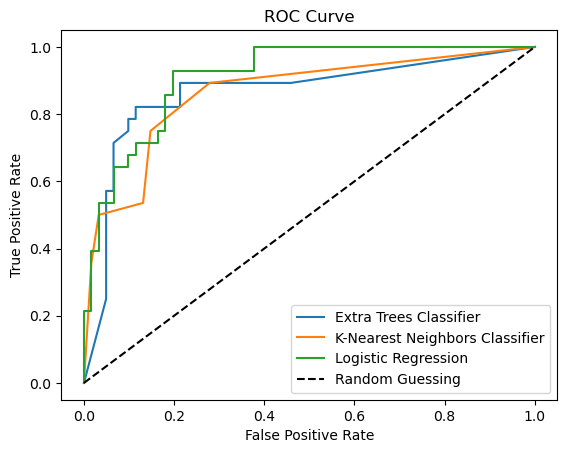

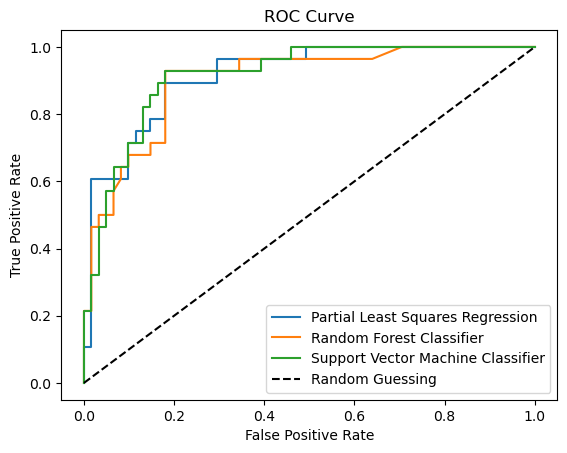

In [33]:
et_probs = et.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
lr_probs = lr.predict_proba(X_test)[:, 1]

pls_probs = pls.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]
svm_probs = svm.decision_function(X_test)

et_fpr, et_tpr, et_thresholds = roc_curve(Y_test, et_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(Y_test, knn_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, lr_probs)
pls_fpr, pls_tpr, pls_thresholds = roc_curve(Y_test, pls_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf_probs)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(Y_test, svm_probs)



plt.plot(et_fpr, et_tpr, label='Extra Trees Classifier' )
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors Classifier')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.plot(pls_fpr, pls_tpr, label='Partial Least Squares Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier')
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

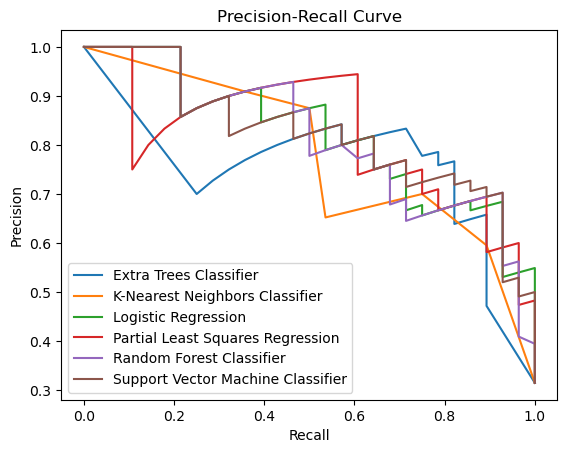

In [34]:
et_precision, et_recall, et_thresholds = precision_recall_curve(Y_test, et_probs)
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(Y_test, knn_probs)
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(Y_test, lr_probs)
pls_precision, pls_recall, pls_thresholds = precision_recall_curve(Y_test, pls_probs)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(Y_test, rf_probs)
svm_precision, svm_recall, svm_thresholds = precision_recall_curve(Y_test, svm_probs)

plt.plot(et_recall, et_precision, label='Extra Trees Classifier')
plt.plot(knn_recall, knn_precision, label='K-Nearest Neighbors Classifier')
plt.plot(lr_recall, lr_precision, label='Logistic Regression')
plt.plot(pls_recall, pls_precision, label='Partial Least Squares Regression')
plt.plot(rf_recall, rf_precision, label='Random Forest Classifier')
plt.plot(svm_recall, svm_precision, label='Support Vector Machine Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [37]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = {
                 "n_estimators": [5,10,20,50, 100, 1000],
                 "max_depth":[5,8,15,25,30],
                 'max_features': ['log2', 'sqrt'],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'bootstrap': [True, False],
                 "max_leaf_nodes": [2, 5,10]}

# Create a gridsearch of the pipeline, the fit the best model
pipe = Pipeline([("classifier", RandomForestClassifier())])
gridsearch = GridSearchCV(estimator= RandomForestClassifier(),param_grid= grid_param, cv=5, verbose=1,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))
print("The best parameters are ", best_model.best_params_)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


RandomForestClassifier(bootstrap=False, max_depth=30, max_leaf_nodes=10,
                       min_samples_split=5, n_estimators=50)
The mean accuracy of the model is: 0.8314606741573034
The best parameters are  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [81]:
trial=RandomForestClassifier(bootstrap=False, max_depth=30, max_leaf_nodes=10,
                       min_samples_split=5, n_estimators=50)
#print best predictor accuracy bacc mcc auc
trial.fit(X_train, Y_train)
trial_pred = trial.predict(X_test)
trial_acc = accuracy_score(Y_test, trial_pred)
print("Accuracy of Random Forest Classifier:", trial_acc)
trial_bacc = balanced_accuracy_score(Y_test, trial_pred)
print("Balanced Accuracy of Random Forest Classifier:", trial_bacc)
trial_mcc = matthews_corrcoef(Y_test, trial_pred)
print("Matthews Correlation Coefficient of Random Forest Classifier:", trial_mcc)
trial_auc = roc_auc_score(Y_test, trial_pred)
print("Area Under the Curve of Random Forest Classifier:", trial_auc)


Accuracy of Random Forest Classifier: 0.8202247191011236
Balanced Accuracy of Random Forest Classifier: 0.7915690866510539
Matthews Correlation Coefficient of Random Forest Classifier: 0.5831381733021077
Area Under the Curve of Random Forest Classifier: 0.791569086651054


In [38]:
#print best predictor accuracy bacc mcc auc
best_pred = best_model.predict(X_test)
best_probs = best_model.predict_proba(X_test)[:, 1]
best_acc = accuracy_score(Y_test, best_pred)
best_bacc = balanced_accuracy_score(Y_test, best_pred)
best_mcc = matthews_corrcoef(Y_test, best_pred)
best_auc = roc_auc_score(Y_test, best_probs)
print("Accuracy of the best model:", best_acc)
print("Balanced Accuracy of the best model:", best_bacc)
print("Matthews Correlation Coefficient of the best model:", best_mcc)
print("Area Under the Curve of the best model:", best_auc)


Accuracy of the best model: 0.8314606741573034
Balanced Accuracy of the best model: 0.8094262295081966
Matthews Correlation Coefficient of the best model: 0.6131354546393648
Area Under the Curve of the best model: 0.9156908665105387


In [ ]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters={'n_estimators': [10, 20, 50, 100, 200, 500, 1000, 1200, 1500, 1800, 1900, 2000, 2100, 3000]}


# Create a gridsearch of the pipeline, the fit the best model
pipe = ExtraTreesClassifier()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))

ExtraTreesClassifier(n_estimators=50)
The mean accuracy of the model is: 0.8651685393258427


In [96]:
##print best predictor accuracy bacc mcc auc
trial=ExtraTreesClassifier()
trial.fit(X_train, Y_train)
trial_pred = trial.predict(X_test)
trial_acc = accuracy_score(Y_test, trial_pred)
print("Accuracy of Extra Trees Classifier:", trial_acc)
trial_bacc = balanced_accuracy_score(Y_test, trial_pred)
print("Balanced Accuracy of Extra Trees Classifier:", trial_bacc)
trial_mcc = matthews_corrcoef(Y_test, trial_pred)
print("Matthews Correlation Coefficient of Extra Trees Classifier:", trial_mcc)
trial_auc = roc_auc_score(Y_test, trial_pred)
print("Area Under the Curve of Extra Trees Classifier:", trial_auc)



Accuracy of Extra Trees Classifier: 0.8539325842696629
Balanced Accuracy of Extra Trees Classifier: 0.8161592505854801
Matthews Correlation Coefficient of Extra Trees Classifier: 0.6533107899693668
Area Under the Curve of Extra Trees Classifier: 0.8161592505854802


In [84]:
best_pred = best_model.predict(X_test)
best_probs = best_model.predict_proba(X_test)[:, 1]
best_acc = accuracy_score(Y_test, best_pred)
best_bacc = balanced_accuracy_score(Y_test, best_pred)
best_mcc = matthews_corrcoef(Y_test, best_pred)
best_auc = roc_auc_score(Y_test, best_probs)
print("Accuracy of the best model:", best_acc)
print("Balanced Accuracy of the best model:", best_bacc)
print("Matthews Correlation Coefficient of the best model:", best_mcc)
print("Area Under the Curve of the best model:", best_auc)

Accuracy of the best model: 0.8314606741573034
Balanced Accuracy of the best model: 0.8094262295081966
Matthews Correlation Coefficient of the best model: 0.6131354546393648
Area Under the Curve of the best model: 0.9156908665105387


In [ ]:
#hyperparameter tuning
# Create a pipeline

# Create dictionary with candidate learning algorithms and their hyperparameters
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'p': [1, 2]}
# Create a gridsearch of the pipeline, the fit the best model
pipe = KNeighborsClassifier()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))


KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=3, p=1)
The mean accuracy of the model is: 0.8202247191011236


In [ ]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']}
# Create a gridsearch of the pipeline, the fit the best model
pipe = SVC()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))


SVC(C=1000, gamma=1, kernel='linear')
The mean accuracy of the model is: 0.8539325842696629


In [132]:
trial=SVC(C=1000, gamma=1, kernel='linear')
trial.fit(X_train, Y_train)
trial_pred = trial.predict(X_test)
trial_acc = accuracy_score(Y_test, trial_pred)
print("Accuracy of Support Vector Machine Classifier:", trial_acc)
trial_bacc = balanced_accuracy_score(Y_test, trial_pred)
print("Balanced Accuracy of Support Vector Machine Classifier:", trial_bacc)
trial_mcc = matthews_corrcoef(Y_test, trial_pred)
print("Matthews Correlation Coefficient of Support Vector Machine Classifier:", trial_mcc)
trial_auc = roc_auc_score(Y_test, trial_pred)
print("Area Under the Curve of Support Vector Machine Classifier:", trial_auc)


Accuracy of Support Vector Machine Classifier: 0.8539325842696629
Balanced Accuracy of Support Vector Machine Classifier: 0.8064988290398127
Matthews Correlation Coefficient of Support Vector Machine Classifier: 0.6502297901356263
Area Under the Curve of Support Vector Machine Classifier: 0.8064988290398127


In [ ]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters = {'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Create a gridsearch of the pipeline, the fit the best model   
pipe = PLSRegression()

    


PLSRegression(n_components=10)
The mean accuracy of the model is: 0.4530795391632374


In [ ]:
#hyperparameter tuning

# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
# Create a gridsearch of the pipeline, the fit the best model
pipe = LogisticRegression()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))
print("The best parameters are ", best_model.best_params_)


/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:118

LogisticRegression(C=78.47599703514607, penalty='l1', solver='liblinear')
The mean accuracy of the model is: 0.8314606741573034
The best parameters are  {'C': 78.47599703514607, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  Fil

In [ ]:


et=ExtraTreesClassifier(n_estimators=1000, max_leaf_nodes=10, min_samples_split=5, n_jobs=-1)

et_cv_scores = cross_val_score(et, X_train, Y_train, cv=5)
knn_cv_scores = cross_val_score(knn, X_train, Y_train, cv=5)
lr_cv_scores = cross_val_score(lr, X_train, Y_train, cv=5)
pls_cv_scores = cross_val_score(pls, X_train, Y_train, cv=5)
rf_cv_scores = cross_val_score(rf, X_train, Y_train, cv=5)
svm_cv_scores = cross_val_score(svm, X_train, Y_train, cv=5)

print("Cross-Validation Scores of Extra Trees Classifier:")
print(et_cv_scores)
print("Cross-Validation Scores of K-Nearest Neighbors Classifier:")
print(knn_cv_scores)
print("Cross-Validation Scores of Logistic Regression:")
print(lr_cv_scores)
print("Cross-Validation Scores of Partial Least Squares Regression:")
print(pls_cv_scores)
print("Cross-Validation Scores of Random Forest Classifier:")
print(rf_cv_scores)
print("Cross-Validation Scores of Support Vector Machine Classifier:")
print(svm_cv_scores)

Cross-Validation Scores of Extra Trees Classifier:
[0.87323944 0.90140845 0.78873239 0.84285714 0.85714286]
Cross-Validation Scores of K-Nearest Neighbors Classifier:
[0.83098592 0.85915493 0.77464789 0.8        0.82857143]
Cross-Validation Scores of Logistic Regression:
[0.84507042 0.8028169  0.83098592 0.8        0.85714286]
Cross-Validation Scores of Partial Least Squares Regression:
[0.         0.43033203 0.         0.         0.        ]
Cross-Validation Scores of Random Forest Classifier:
[0.85915493 0.85915493 0.78873239 0.81428571 0.87142857]
Cross-Validation Scores of Support Vector Machine Classifier:
[0.85915493 0.84507042 0.85915493 0.84285714 0.85714286]


In [ ]:
#try ensemble methods like voting, stacking, bagging and boosting
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = ExtraTreesClassifier()
clf4 = KNeighborsClassifier()
clf5 = SVC()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('et', clf3), ('knn', clf4), ('svm', clf5)], voting='hard')
# Create a gridsearch of the pipeline, the fit the best model
pipe = eclf
pipe.fit(X_train, Y_train)
print("The mean accuracy of the model is:",pipe.score(X_test, Y_test))


The mean accuracy of the model is: 0.8314606741573034


In [ ]:
#stacking
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = ExtraTreesClassifier()
clf4 = KNeighborsClassifier()
clf5 = SVC()
sclf = StackingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('et', clf3), ('knn', clf4), ('svm', clf5)], final_estimator=SVC())
# Create a gridsearch of the pipeline, the fit the best model
pipe = sclf
pipe.fit(X_train, Y_train)


print("The mean accuracy of the model is:",pipe.score(X_test, Y_test))


The mean accuracy of the model is: 0.8202247191011236


In [ ]:
#bagging
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
clf = RandomForestClassifier()
bagging = BaggingClassifier(estimator=clf, n_estimators=10, random_state=0)
# Create a gridsearch of the pipeline, the fit the best model
pipe = bagging
pipe.fit(X_train, Y_train)
print("The mean accuracy of the model is:",pipe.score(X_test, Y_test))

The mean accuracy of the model is: 0.8202247191011236


In [ ]:
#boosting
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
clf = RandomForestClassifier()
adaboost = AdaBoostClassifier(estimator=clf, n_estimators=50, random_state=0)
# Create a gridsearch of the pipeline, the fit the best model
pipe = adaboost
pipe.fit(X_train, Y_train)
print("The mean accuracy of the model is:",pipe.score(X_test, Y_test))


The mean accuracy of the model is: 0.8202247191011236


In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


rf_clf = RandomForestClassifier(bootstrap=False, max_depth=30, max_leaf_nodes=10, min_samples_split=5, n_estimators=50)
et_clf = ExtraTreesClassifier(n_estimators=50)
knn_clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=3, p=1)
svc_clf = SVC(C=1000, gamma=1, kernel='linear')

# Fit the classifiers and perform cross-validation
clfs = [rf_clf, et_clf, knn_clf, svc_clf]
for clf in clfs:
    pipe = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipe, X_train, Y_train, cv=5, scoring='accuracy')
    y_pred = cross_val_predict(pipe, X_train, Y_train, cv=5)
    bacc = balanced_accuracy_score(Y_train, y_pred)
    mcc = matthews_corrcoef(Y_train, y_pred)
    tn, fp, fn, tp = confusion_matrix(Y_train, y_pred).ravel()
    sn = tp / (tp + fn)
    sp = tn / (tn + fp)
    auc = roc_auc_score(Y_train, y_pred)
    print(f"{type(clf).__name__}: Accuracy: {scores.mean()}, Std: {scores.std()}, BACC: {bacc}, MCC: {mcc}, Sensitivity: {sn}, Specificity: {sp}, AUC: {auc}")

# Apply Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('et', et_clf), ('knn', knn_clf), ('svc', svc_clf)], voting='hard')
pipe_voting = make_pipeline(StandardScaler(), voting_clf)
pipe_voting.fit(X_train, Y_train)
y_pred_voting = pipe_voting.predict(X_test)
print(f"Voting Classifier: Accuracy: {accuracy_score(Y_test, y_pred_voting)}")
bacc = balanced_accuracy_score(Y_test, y_pred_voting)
mcc = matthews_corrcoef(Y_test, y_pred_voting)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_voting).ravel()
sn = tp / (tp + fn)
sp = tn / (tn + fp)
auc = roc_auc_score(Y_test, y_pred_voting)
print(f"Stacking Classifier: BACC: {bacc}, MCC: {mcc}, Sensitivity: {sn}, Specificity: {sp}, AUC: {auc}")

# Apply Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf_clf), ('et', et_clf), ('knn', knn_clf), ('svc', svc_clf)],final_estimator=SVC())
pipe_stacking = make_pipeline(StandardScaler(), stacking_clf)
pipe_stacking.fit(X_train, Y_train)
y_pred_stacking = pipe_stacking.predict(X_test)
print(f"Stacking Classifier: Accuracy: {accuracy_score(Y_test, y_pred_stacking)}")
#print bacc mcc sn sp auc
bacc = balanced_accuracy_score(Y_test, y_pred_stacking)
mcc = matthews_corrcoef(Y_test, y_pred_stacking)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_stacking).ravel()
sn = tp / (tp + fn)
sp = tn / (tn + fp)
auc = roc_auc_score(Y_test, y_pred_stacking)
print(f"Stacking Classifier: BACC: {bacc}, MCC: {mcc}, Sensitivity: {sn}, Specificity: {sp}, AUC: {auc}")


# Final estimate using SVC
final_svc_clf = SVC(C=1000, gamma=1, kernel='linear')
pipe_final_svc = make_pipeline(StandardScaler(), final_svc_clf)
pipe_final_svc.fit(X_train, Y_train)
y_pred_final_svc = pipe_final_svc.predict(X_test)
print(f"Final estimate using SVC: Accuracy: {accuracy_score(Y_test, y_pred_final_svc)}")

RandomForestClassifier: Accuracy: 0.8525955734406437, Std: 0.021896525603854036, BACC: 0.8269672495554239, MCC: 0.6676293783702535, Sensitivity: 0.7410714285714286, Specificity: 0.9128630705394191, AUC: 0.8269672495554238
ExtraTreesClassifier: Accuracy: 0.8301006036217304, Std: 0.05015392345043722, BACC: 0.8100548310610551, MCC: 0.6247091524976351, Sensitivity: 0.7321428571428571, Specificity: 0.8879668049792531, AUC: 0.8100548310610551
KNeighborsClassifier: Accuracy: 0.841368209255533, Std: 0.01882706401897735, BACC: 0.8025711321873148, MCC: 0.6250499978830215, Sensitivity: 0.6964285714285714, Specificity: 0.9087136929460581, AUC: 0.8025711321873147
SVC: Accuracy: 0.8468812877263581, Std: 0.0335744899535069, BACC: 0.8138893005334914, MCC: 0.6409257161908076, Sensitivity: 0.7232142857142857, Specificity: 0.9045643153526971, AUC: 0.8138893005334913
Voting Classifier: Accuracy: 0.8651685393258427
Stacking Classifier: BACC: 0.8050351288056206, MCC: 0.6787099914441875, Sensitivity: 0.64285